# Module 3: Introduction to Natural Language Processing

This exercise introduces you to NLP using a dataset of tweets about Cambodia elections. In this exercise, you will...

1. Load in a dataset of tweets about Cambodia Elections
2. Utilize the NLP Pipeline to clean, tokenize, stem, remove stop words from the tweets
3. Analyze and visualize the results

Let's import the necessary Python libraries.

In [ ]:
# import necessary libraries
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We will load our data from github using the url below.

In [ ]:
# load our data into a pandas dataframe
tweets_df = pd.read_csv('https://raw.githubusercontent.com/SURGEDataHub/Intermediate-Social-Media-Analysis/main/Module%203/cambodia_election_tweets_2022.csv', index_col=0, parse_dates=['date'])

In [ ]:
# view our data
tweets_df

,id,date,time,user_id,username,name,tweet,language,replies_count,retweets_count,likes_count,keywords
0,1561550707433488385,2022-08-21,23:07:55,202102332,noansereiboth,Noan Sereiboth,Time to visit after they were gone. https://t...,en,1,0,11,['elect']
1,1561250590692237312,2022-08-21,03:15:22,202102332,noansereiboth,Noan Sereiboth,"As of this Saturday, 277.5 out of 530 hectares...",en,3,4,21,['elect']
2,1560614801810026496,2022-08-19,09:08:58,202102332,noansereiboth,Noan Sereiboth,Dramatic Escape at Koh Thom Casino Triggers Go...,en,0,0,7,['elect']
3,1560577260041945088,2022-08-19,06:39:47,202102332,noansereiboth,Noan Sereiboth,"""We also condemn the authorities’ unconscionab...",en,0,6,18,['elect']
4,1560573761845227521,2022-08-19,06:25:53,202102332,noansereiboth,Noan Sereiboth,Bayon TV anchor Eng Rithy is appointed deputy ...,en,2,1,12,['elect']
...,...,...,...,...,...,...,...,...,...,...,...,...
2499,1479579289146335240,2022-01-07,17:22:46,1149465366,ratazorn,Ramon Ratazorn,@Reaproy @hrw @PeacePalaceKH Cambodian ex Gene...,en,0,0,0,"['human rights violation', 'cambodia']"
2500,1479011224834637825,2022-01-06,03:45:29,1360580307150282752,backoff_788,kim Seng,#cambodia Warren Patrick Murphy is not suitabl...,en,0,0,0,"['human rights violation', 'cambodia']"
2501,1547055808386670592,2022-07-12,23:10:22,2579852005,khmertimes,Khmer Times,The Covid-19 pandemic has had an unprecedented...,en,0,1,0,"['socio-economic impact', 'cambodia']"
2502,1481237760908627970,2022-01-12,07:12:56,132817716,cambopedia,Cambopedia,Socio-economic impact assessment of COVID-19 i...,en,0,0,0,"['socio-economic impact', 'cambodia']"


## 1. Text Cleaning
Here we need to clean our tweets before analysis otherwise our results won't be very useful. We need to...
- Select only English tweets for simplicity 
- Make tweets lowercase
- Remove hashtags
- Remove twitter handles
- Remove urls

### 👉 Exercise: Remove Punctuation
Can you add the necessary code to remove punctation from the tweets? Use the other regex statements in the ```clean_text``` function to help you and simply replace the regular expression that removes punctation symbols.

Solution will be provided later.

In [ ]:
# filter non-english tweets
tweets_df = tweets_df.loc[tweets_df['language']=='en'].copy()

# clean tweets
def clean_text(corpus):
    # make lowercase
    corpus = [tweet.lower() for tweet in corpus]
    # remove twitter account handles
    corpus = [re.sub(r'@\w+','',tweet) for tweet in corpus]
    # remove hashtag symbols but keep hashtag words
    corpus = [re.sub(r'#\w+','',tweet) for tweet in corpus]
    # remove urls
    corpus = [re.sub(r'http\S+','',tweet) for tweet in corpus]
    # remove numbers
    corpus = [re.sub(r'\d+','',tweet) for tweet in corpus]

    # remove punctuation
    ############################
    ### WRITE YOUR CODE HERE ###
    ############################

    # filter out specific characters
    corpus = [re.sub(r' amp ',' ',tweet) for tweet in corpus]
    # remove extra whitespace
    corpus = [tweet.strip() for tweet in corpus]
    corpus = [re.sub(r'\s{2,}',' ',tweet) for tweet in corpus]

    return corpus

In [ ]:
# apply cleaning function
tweets_df['clean_tweet'] = clean_text(tweets_df.tweet)
tweets_df.reset_index(inplace=True, drop=True)

In [ ]:
tweets_df.head(5)

,id,date,time,user_id,username,name,tweet,language,replies_count,retweets_count,likes_count,keywords,clean_tweet
0,1561550707433488385,2022-08-21,23:07:55,202102332,noansereiboth,Noan Sereiboth,Time to visit after they were gone. https://t...,en,1,0,11,['elect'],time to visit after they were gone
1,1561250590692237312,2022-08-21,03:15:22,202102332,noansereiboth,Noan Sereiboth,"As of this Saturday, 277.5 out of 530 hectares...",en,3,4,21,['elect'],as of this saturday out of hectares of cleared...
2,1560614801810026496,2022-08-19,09:08:58,202102332,noansereiboth,Noan Sereiboth,Dramatic Escape at Koh Thom Casino Triggers Go...,en,0,0,7,['elect'],dramatic escape at koh thom casino triggers go...
3,1560577260041945088,2022-08-19,06:39:47,202102332,noansereiboth,Noan Sereiboth,"""We also condemn the authorities’ unconscionab...",en,0,6,18,['elect'],we also condemn the authorities unconscionable...
4,1560573761845227521,2022-08-19,06:25:53,202102332,noansereiboth,Noan Sereiboth,Bayon TV anchor Eng Rithy is appointed deputy ...,en,2,1,12,['elect'],bayon tv anchor eng rithy is appointed deputy ...


## 2. Tokenization
Now we can turn our cleaned tweets into lists of individual tokens. This allows us to later count how many unique words occur in our dataset. 

In [ ]:
# function tokenize to get the tokens for each tweet 
def get_tokens(corpus):
    corpus = [word_tokenize(tweet) for tweet in corpus]

    return corpus

In [ ]:
# apply function to our cleaned tweets
tweets_df['tokenized'] = get_tokens(tweets_df.clean_tweet)

In [ ]:
tweets_df.head(5)

,id,date,time,user_id,username,name,tweet,language,replies_count,retweets_count,likes_count,keywords,clean_tweet,tokenized
0,1561550707433488385,2022-08-21,23:07:55,202102332,noansereiboth,Noan Sereiboth,Time to visit after they were gone. https://t...,en,1,0,11,['elect'],time to visit after they were gone,"[time, to, visit, after, they, were, gone]"
1,1561250590692237312,2022-08-21,03:15:22,202102332,noansereiboth,Noan Sereiboth,"As of this Saturday, 277.5 out of 530 hectares...",en,3,4,21,['elect'],as of this saturday out of hectares of cleared...,"[as, of, this, saturday, out, of, hectares, of..."
2,1560614801810026496,2022-08-19,09:08:58,202102332,noansereiboth,Noan Sereiboth,Dramatic Escape at Koh Thom Casino Triggers Go...,en,0,0,7,['elect'],dramatic escape at koh thom casino triggers go...,"[dramatic, escape, at, koh, thom, casino, trig..."
3,1560577260041945088,2022-08-19,06:39:47,202102332,noansereiboth,Noan Sereiboth,"""We also condemn the authorities’ unconscionab...",en,0,6,18,['elect'],we also condemn the authorities unconscionable...,"[we, also, condemn, the, authorities, unconsci..."
4,1560573761845227521,2022-08-19,06:25:53,202102332,noansereiboth,Noan Sereiboth,Bayon TV anchor Eng Rithy is appointed deputy ...,en,2,1,12,['elect'],bayon tv anchor eng rithy is appointed deputy ...,"[bayon, tv, anchor, eng, rithy, is, appointed,..."


## 3. Stemming
As discussed in the Easy Generator module, stemming helps reduce various grammatical forms of words to a single stem or root form. That way when we count up unique words, we don't count words with the same meaning but different grammatical forms separately.

In [ ]:
# Specify the Stemmer you will use 
stemmer = PorterStemmer()

# function to get stems of all words in each tweet
def get_stem(corpus):
    stemmed_corpus = []
    for tweet in corpus:
        tweet = [stemmer.stem(word) for word in tweet]
        stemmed_corpus.append(tweet)

    return stemmed_corpus

In [ ]:
# apply function to the tokens 
tweets_df['stemmed'] = get_stem(tweets_df.tokenized)

In [ ]:
tweets_df.head(5)

,id,date,time,user_id,username,name,tweet,language,replies_count,retweets_count,likes_count,keywords,clean_tweet,tokenized,stemmed
0,1561550707433488385,2022-08-21,23:07:55,202102332,noansereiboth,Noan Sereiboth,Time to visit after they were gone. https://t...,en,1,0,11,['elect'],time to visit after they were gone,"[time, to, visit, after, they, were, gone]","[time, to, visit, after, they, were, gone]"
1,1561250590692237312,2022-08-21,03:15:22,202102332,noansereiboth,Noan Sereiboth,"As of this Saturday, 277.5 out of 530 hectares...",en,3,4,21,['elect'],as of this saturday out of hectares of cleared...,"[as, of, this, saturday, out, of, hectares, of...","[as, of, thi, saturday, out, of, hectar, of, c..."
2,1560614801810026496,2022-08-19,09:08:58,202102332,noansereiboth,Noan Sereiboth,Dramatic Escape at Koh Thom Casino Triggers Go...,en,0,0,7,['elect'],dramatic escape at koh thom casino triggers go...,"[dramatic, escape, at, koh, thom, casino, trig...","[dramat, escap, at, koh, thom, casino, trigger..."
3,1560577260041945088,2022-08-19,06:39:47,202102332,noansereiboth,Noan Sereiboth,"""We also condemn the authorities’ unconscionab...",en,0,6,18,['elect'],we also condemn the authorities unconscionable...,"[we, also, condemn, the, authorities, unconsci...","[we, also, condemn, the, author, unconscion, a..."
4,1560573761845227521,2022-08-19,06:25:53,202102332,noansereiboth,Noan Sereiboth,Bayon TV anchor Eng Rithy is appointed deputy ...,en,2,1,12,['elect'],bayon tv anchor eng rithy is appointed deputy ...,"[bayon, tv, anchor, eng, rithy, is, appointed,...","[bayon, tv, anchor, eng, rithi, is, appoint, d..."


## 4. Stop word removal
Now we need to remove stop words because if they are included, they will interfere with our ability to determine the most frequent words related to the actual content (people's perceptions, concerns, and priorities) contained in the tweets. 

In [ ]:
# get English stop words 
english_stop_words = stopwords.words('english')

# function to remove stopwords 
def remove_stopwords(corpus):
    corpus_no_stops = []
    for tweet in corpus:
        no_stops = [word for word in tweet if word not in english_stop_words]
        corpus_no_stops.append(no_stops)
        
    return corpus_no_stops

In [ ]:
# apply function to our stemmed tweets
tweets_df['final_text'] = remove_stopwords(tweets_df.stemmed)

In [ ]:
tweets_df

,id,date,time,user_id,username,name,tweet,language,replies_count,retweets_count,likes_count,keywords,clean_tweet,tokenized,stemmed,final_text
0,1561550707433488385,2022-08-21,23:07:55,202102332,noansereiboth,Noan Sereiboth,Time to visit after they were gone. https://t...,en,1,0,11,['elect'],time to visit after they were gone,"[time, to, visit, after, they, were, gone]","[time, to, visit, after, they, were, gone]","[time, visit, gone]"
1,1561250590692237312,2022-08-21,03:15:22,202102332,noansereiboth,Noan Sereiboth,"As of this Saturday, 277.5 out of 530 hectares...",en,3,4,21,['elect'],as of this saturday out of hectares of cleared...,"[as, of, this, saturday, out, of, hectares, of...","[as, of, thi, saturday, out, of, hectar, of, c...","[thi, saturday, hectar, clear, phnom, tamao, a..."
2,1560614801810026496,2022-08-19,09:08:58,202102332,noansereiboth,Noan Sereiboth,Dramatic Escape at Koh Thom Casino Triggers Go...,en,0,0,7,['elect'],dramatic escape at koh thom casino triggers go...,"[dramatic, escape, at, koh, thom, casino, trig...","[dramat, escap, at, koh, thom, casino, trigger...","[dramat, escap, koh, thom, casino, trigger, go..."
3,1560577260041945088,2022-08-19,06:39:47,202102332,noansereiboth,Noan Sereiboth,"""We also condemn the authorities’ unconscionab...",en,0,6,18,['elect'],we also condemn the authorities unconscionable...,"[we, also, condemn, the, authorities, unconsci...","[we, also, condemn, the, author, unconscion, a...","[also, condemn, author, unconscion, abus, powe..."
4,1560573761845227521,2022-08-19,06:25:53,202102332,noansereiboth,Noan Sereiboth,Bayon TV anchor Eng Rithy is appointed deputy ...,en,2,1,12,['elect'],bayon tv anchor eng rithy is appointed deputy ...,"[bayon, tv, anchor, eng, rithy, is, appointed,...","[bayon, tv, anchor, eng, rithi, is, appoint, d...","[bayon, tv, anchor, eng, rithi, appoint, deput..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,1479579289146335240,2022-01-07,17:22:46,1149465366,ratazorn,Ramon Ratazorn,@Reaproy @hrw @PeacePalaceKH Cambodian ex Gene...,en,0,0,0,"['human rights violation', 'cambodia']",cambodian ex general hun sen is todays cambodi...,"[cambodian, ex, general, hun, sen, is, todays,...","[cambodian, ex, gener, hun, sen, is, today, ca...","[cambodian, ex, gener, hun, sen, today, cambod..."
2101,1479011224834637825,2022-01-06,03:45:29,1360580307150282752,backoff_788,kim Seng,#cambodia Warren Patrick Murphy is not suitabl...,en,0,0,0,"['human rights violation', 'cambodia']",warren patrick murphy is not suitable to call ...,"[warren, patrick, murphy, is, not, suitable, t...","[warren, patrick, murphi, is, not, suitabl, to...","[warren, patrick, murphi, suitabl, call, hi, e..."
2102,1547055808386670592,2022-07-12,23:10:22,2579852005,khmertimes,Khmer Times,The Covid-19 pandemic has had an unprecedented...,en,0,1,0,"['socio-economic impact', 'cambodia']",the covid pandemic has had an unprecedented im...,"[the, covid, pandemic, has, had, an, unprecede...","[the, covid, pandem, ha, had, an, unpreced, im...","[covid, pandem, ha, unpreced, impact, cambodia..."
2103,1481237760908627970,2022-01-12,07:12:56,132817716,cambopedia,Cambopedia,Socio-economic impact assessment of COVID-19 i...,en,0,0,0,"['socio-economic impact', 'cambodia']",socioeconomic impact assessment of covid in wave,"[socioeconomic, impact, assessment, of, covid,...","[socioeconom, impact, assess, of, covid, in, w...","[socioeconom, impact, assess, covid, wave]"


## 5. Analysis 
Now that we have used NLP to clean our tweets, let's do some descriptive analysis to understand what social media users are saying about Cambodia's elections in 2022.

### 5.1 Most frequent word in entire corpus
First, we can get a count of the most frequent individual words. We take this as a measure of what user's find important... the more frequent the word, the more user's found it important to talk about. 

In [ ]:
# get a list of all words in the corpus
all_words = list(itertools.chain(*tweets_df.final_text))

# count how many times each word occurs
word_counts = collections.Counter(all_words)

# Top 15 most common words
word_counts.most_common(15)

[('cambodia', 1419),
 ('elect', 625),
 ('parti', 423),
 ('peopl', 291),
 ('cambodian', 290),
 ('right', 282),
 ('human', 270),
 ('hun', 261),
 ('thi', 256),
 ('commun', 255),
 ('nation', 248),
 ('ha', 241),
 ('sen', 238),
 ('opposit', 228),
 ('wa', 214)]

### 5.2 Most frequent bigrams
We can also do the same for bigrams (or groupings of two words that occur together). This helps give us a little bit more context compared to our single word analysis. What words do you see are the same in our list of more frequent single words? What words are different?

In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_df.final_text]

# View bigrams of the last tweet in corpus
terms_bigram[-1:]

[[('thi', 'ha'),
  ('ha', 'found'),
  ('found', 'neg'),
  ('neg', 'impact'),
  ('impact', 'effect'),
  ('effect', 'monast'),
  ('monast', 'contribut'),
  ('contribut', 'vision'),
  ('vision', 'assist'),
  ('assist', 'socioeconom'),
  ('socioeconom', 'develop')]]

In [ ]:
# get a list of all words in the corpus
all_bigrams = list(itertools.chain(*terms_bigram))

# count how many times each word occurs
bigram_counts = collections.Counter(all_bigrams)

# Top 15 most common words
bigram_counts.most_common(15)

[(('hun', 'sen'), 231),
 (('human', 'right'), 210),
 (('commun', 'elect'), 144),
 (('prime', 'minist'), 127),
 (('minist', 'hun'), 95),
 (('nation', 'elect'), 92),
 (('rule', 'parti'), 91),
 (('cambodian', 'peopl'), 86),
 (('opposit', 'parti'), 86),
 (('peopl', 'parti'), 79),
 (('free', 'fair'), 72),
 (('phnom', 'penh'), 72),
 (('candlelight', 'parti'), 66),
 (('cambodian', 'prime'), 59),
 (('opposit', 'politician'), 56)]

### 5.3 Most frequent word on specific dates
It may also be useful to see what different terms are used on dates of interest. Cambodia's Commune Elections for their smallest administrative units occurred this year on 5 June 2022. What were user's saying on social media that day?

### 👉 Exercise: Most frequent words on the day of Cambodia's Commune Elections
Find the most common words that appear in this corpus of tweets on the date of Cambodia's 2022 Commune Elections. The date of interest is 5 June 2022. 

***Hint***: Try filtering the tweets by selecting all the tweets on this date and then calculating the frequency of individual words.

Solution will be provided later.

In [ ]:
############################
### WRITE YOUR CODE HERE ###
############################

### 5.4 Wordcloud of most frequent words for entire corpus
Word clouds are a simple way to visualize any of our results from this analysis. The larger the word in a word cloud, the more frequent it was and we can interpret this size as a relative measure of importance.

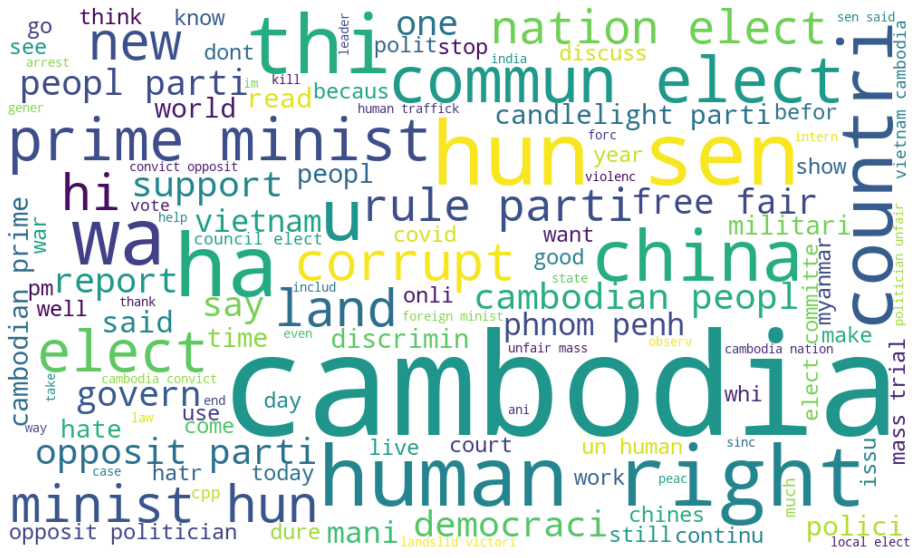

In [ ]:
# get all tweets
corpus_of_all_tweets = " ".join([" ".join([word for word in tweet]) for tweet in tweets_df.final_text])

wordcloud = WordCloud(max_words=120, background_color="white", width=1000, height=600).generate(corpus_of_all_tweets)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 5.5 Wordcloud of most frequent words for day of Commune Elections

### 👉 Exercise: Wordcloud for the day of Cambodia's Commune Elections
Modify the code from the wordcloud example above to visualize the most frequent words on 5 June 2022.  

Solution will be provided later.

In [ ]:
############################
### WRITE YOUR CODE HERE ###
############################